In [1]:
import circle_detection_functions
import picture_creator
import line_detection_functions

import numpy as np

import matplotlib.pyplot as plt
from functools import partial

In [2]:
generator_function = partial(picture_creator.generate_random_picure)
circle_detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)
line_detecter_function = partial(line_detection_functions.get_next_pos)

In [3]:
image, positions = generator_function()
detected_positions = list(circle_detecter_function(image))

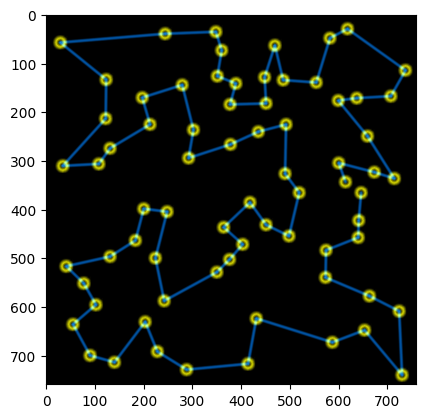

In [4]:
plt.imshow(image)

In [5]:
start_pos = 0
dist = np.linalg.norm(positions[0] - detected_positions[0])
for i in range(len(detected_positions)):
    if np.linalg.norm(positions[0] - detected_positions[i]) < dist:
        start_pos = i
        dist = np.linalg.norm(positions[0] - detected_positions[i])
print("true start_pos: ",positions[0])
print("detected start_pos: ",start_pos," : ",detected_positions[start_pos])

true start_pos:  [646 366]
detected start_pos:  33  :  [645 366]


In [6]:
remaining_positions = list(detected_positions.copy())

current_pos = remaining_positions.pop(start_pos)
i = 1

sorted_positions = [current_pos]
while len(remaining_positions) > 0:
    next_pos = line_detecter_function(image, current_pos, remaining_positions)
    print("true next_pos: ",positions[i])
    i += 1
    print("detected next_pos: ",remaining_positions[next_pos])
    print("")
    current_pos = remaining_positions.pop(next_pos)
    sorted_positions.append(current_pos)


true next_pos:  [641 423]
detected next_pos:  [639 458]

true next_pos:  [640 458]
detected next_pos:  [573 484]

true next_pos:  [574 484]
detected next_pos:  [572 540]

true next_pos:  [573 540]
detected next_pos:  [662 578]

true next_pos:  [663 578]
detected next_pos:  [723 609]

true next_pos:  [724 609]
detected next_pos:  [729 740]

true next_pos:  [730 740]
detected next_pos:  [652 648]

true next_pos:  [653 648]
detected next_pos:  [586 673]

true next_pos:  [587 673]
detected next_pos:  [430 624]

true next_pos:  [431 624]
detected next_pos:  [413 717]

true next_pos:  [414 717]
detected next_pos:  [287 729]

true next_pos:  [288 729]
detected next_pos:  [227 692]

true next_pos:  [228 692]
detected next_pos:  [202 631]

true next_pos:  [203 631]
detected next_pos:  [139 714]

true next_pos:  [140 714]
detected next_pos:  [ 89 700]

true next_pos:  [ 90 700]
detected next_pos:  [ 54 636]

true next_pos:  [ 55 636]
detected next_pos:  [101 596]

true next_pos:  [102 596]
detec

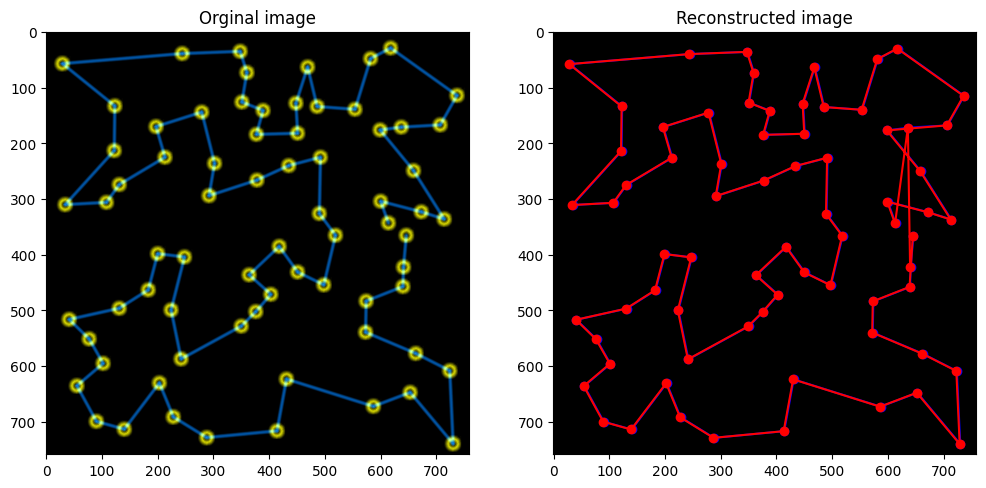

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

axs[0].imshow(image)
axs[0].set_title("Orginal image")

aprox_image = np.zeros(image.shape)
axs[1].imshow(aprox_image)
axs[1].set_title("Reconstructed image")
axs[1].plot([x[0] for x in positions], [x[1] for x in positions], 'bo-')
axs[1].plot([x[0] for x in sorted_positions], [x[1] for x in sorted_positions], 'ro-')